In [45]:
import os
import numpy as np
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# Data directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'
valid_dir = '/content/drive/MyDrive/A/Valid'
# Image dimensions
img_width, img_height = 600, 600  # Adjust according to your image dimensions
batch_size = 32
num_epochs = 30

In [47]:
# Load model for feature extraction
model = ResNet50(weights='imagenet', include_top=True)

In [48]:
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # ResNet50 requires input size of 224x224
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)  # Preprocess input for ResNet50
    features = model.predict(img_data)
    return features


In [49]:
# Load images and extract features for training set
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train.append(features.flatten())
        y_train.append(i)


1/1 [==============================] - 0s 204ms/step


In [50]:
# Load images and extract features for test set
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test.append(features.flatten())
        y_test.append(i)


1/1 [==============================] - 0s 340ms/step


In [72]:
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters
max_depth = 10
min_samples_split = 2
min_samples_leaf = 1
max_features = None  # Set to None for auto
criterion = 'gini'
splitter = 'best'

# Create and train the Decision Tree classifier with adjusted hyperparameters
clf = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    criterion=criterion,
    splitter=splitter
)
clf.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4)

In [73]:
# Predict on test set
y_pred = clf.predict(x_test)

In [74]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[24 12 19  3  2]
 [13 29 17  0  1]
 [15 27 13  1  4]
 [ 6  1 11 34  8]
 [ 5  4  9 12 30]]


In [75]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.40      0.39        60
           1       0.40      0.48      0.44        60
           2       0.19      0.22      0.20        60
           3       0.68      0.57      0.62        60
           4       0.67      0.50      0.57        60

    accuracy                           0.43       300
   macro avg       0.46      0.43      0.44       300
weighted avg       0.46      0.43      0.44       300




Accuracy: 0.4533333333333333
Precision: 0.4545010349424251
Recall: 0.4533333333333333
F1 Score: 0.4462914457319272


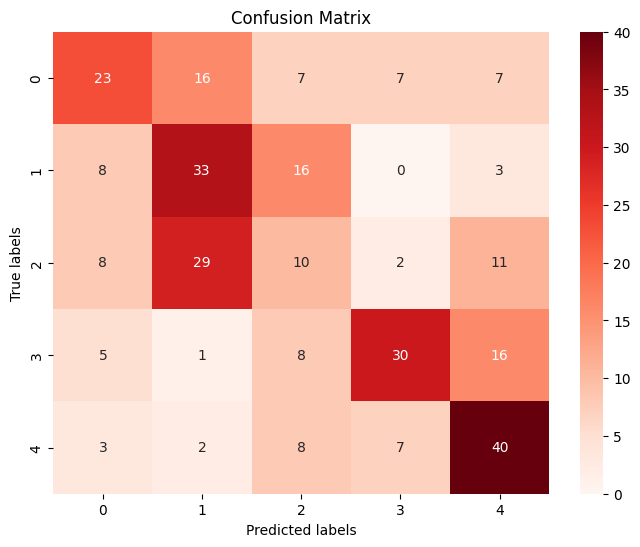

In [67]:
# Performance metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()